Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.utils import to_categorical


Load the Dataset

In [3]:
# Load the dataset
train_data = pd.read_csv('dataset/data.csv')
test_data = pd.read_csv('dataset/test.csv')

# Split into features and labels
X = train_data.iloc[:, 1:].values / 255.0  # Normalize pixel values
y = train_data.iloc[:, 0].values

# Normalize the test data
X_test_data = test_data.values / 255.0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Visualize Sample Digits

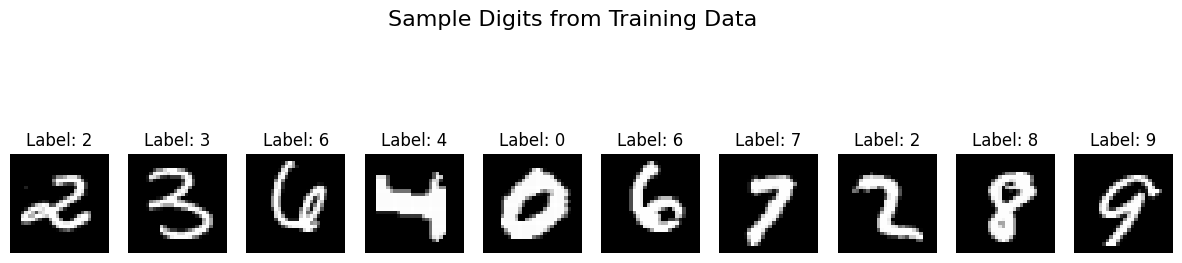

In [6]:
# Visualize a few images from the training data
def visualize_samples(X, y, samples=10):
    plt.figure(figsize=(15, 4))
    for i in range(samples):
        plt.subplot(1, samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.suptitle("Sample Digits from Training Data", fontsize=16)
    plt.show()

visualize_samples(X_train, y_train)

Preprocess the Data

In [7]:
# # Standardize the data (mean = 0, variance = 1)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# print("Data Preprocessing Complete!")

PCA (Dimensionality Reduction)

In [8]:
# Reduce dimensionality
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Explained Variance (PCA): {sum(pca.explained_variance_ratio_):.4f}")

# Train a Logistic Regression model on PCA-transformed data
model_pca = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Logistic Regression Accuracy with PCA: {accuracy_pca:.4f}")

Explained Variance (PCA): 0.8257


c:\Users\Vaibhav Tandon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy with PCA: 0.9065


Define and Train Multiple Models

In [9]:
# Define a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial'),
    "SVM (Linear Kernel)": SVC(kernel='linear', C=1.0),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma=0.1, C=1.0),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
model_accuracies = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    
    print(f"{model_name} Accuracy: {accuracy:.4f}\n")
    
    # Display a classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...


c:\Users\Vaibhav Tandon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9131


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       827
           1       0.93      0.98      0.95       937
           2       0.91      0.90      0.91       835
           3       0.90      0.88      0.89       870
           4       0.92      0.91      0.91       814
           5       0.87      0.86      0.86       759
           6       0.95      0.96      0.96       827
           7       0.93      0.93      0.93       880
           8       0.88      0.85      0.87       813
           9       0.87      0.90      0.89       838

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400

Training SVM (Linear Kernel)...
SVM (Linear Kernel) Accuracy: 0.9286


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0

Cross-Validation for Model Robustness

In [10]:
# Perform cross-validation for all models
cv_results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = scores.mean()
    print(f"{model_name} Cross-Validated Accuracy: {scores.mean():.4f}")

c:\Users\Vaibhav Tandon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Vaibhav Tandon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Vaibhav Tandon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Vaibhav Ta

Logistic Regression Cross-Validated Accuracy: 0.9156
SVM (Linear Kernel) Cross-Validated Accuracy: 0.9279
SVM (RBF Kernel) Cross-Validated Accuracy: 0.9249
Decision Tree Cross-Validated Accuracy: 0.8390
Random Forest Cross-Validated Accuracy: 0.9608
K-Nearest Neighbors Cross-Validated Accuracy: 0.9650


Hyperparameter Tuning

In [11]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.4f}")

# Evaluate on the test set
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy (Tuned Random Forest): {accuracy_rf:.4f}")

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.9624
Test Accuracy (Tuned Random Forest): 0.9663


Ensemble Method (Voting Classifier)

In [12]:
# Ensemble Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', models['Logistic Regression']),
    ('rf', models['Random Forest']),
    ('svm', models['SVM (RBF Kernel)'])
], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")

c:\Users\Vaibhav Tandon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Voting Classifier Accuracy: 0.9580


Compare Model Performances

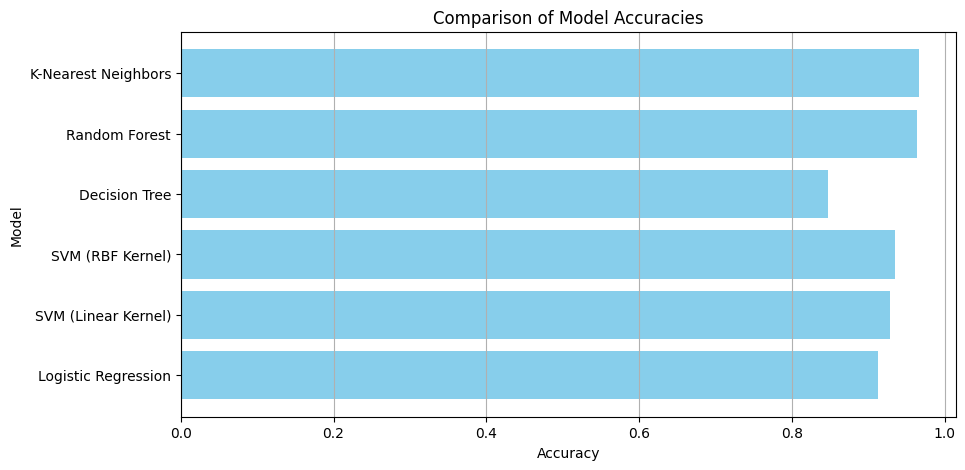

In [13]:
# Plot the accuracies of all models
plt.figure(figsize=(10, 5))
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Comparison of Model Accuracies")
plt.grid(axis='x')
plt.show()

Analyze the Best Model

The best model is: K-Nearest Neighbors with an accuracy of 96.6310

Classification Report of the Best Model:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       827
           1       0.95      1.00      0.97       937
           2       0.99      0.96      0.97       835
           3       0.96      0.96      0.96       870
           4       0.97      0.97      0.97       814
           5       0.95      0.96      0.96       759
           6       0.98      0.99      0.98       827
           7       0.97      0.97      0.97       880
           8       0.99      0.91      0.94       813
           9       0.94      0.96      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



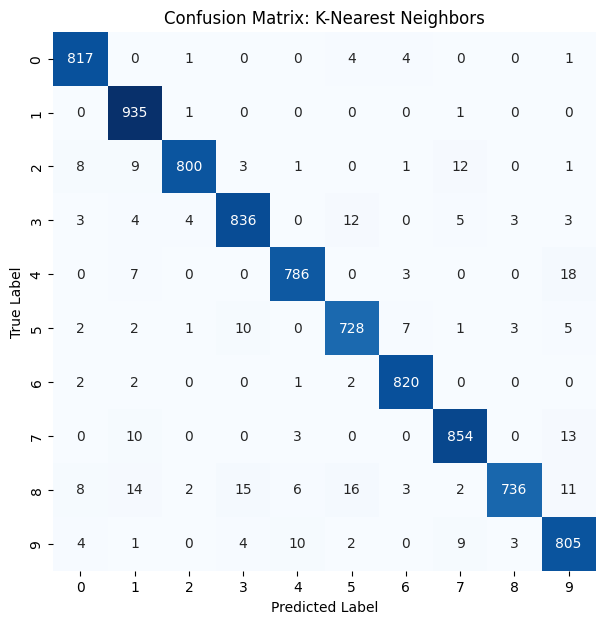

In [51]:
# Find the best-performing model
best_model_name = max(model_accuracies, key=model_accuracies.get)
print(f"The best model is: {best_model_name} with an accuracy of {model_accuracies[best_model_name]*100:.4f}")

# Get the best model
best_model = models[best_model_name]

# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Display the classification report
print("\nClassification Report of the Best Model:")
print(classification_report(y_test, y_pred_best))

# Confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix: {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Save Predictions

In [18]:
# Save predictions for the best model
import os
os.makedirs('results', exist_ok=True)
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
output.to_csv('results/predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'


Error Analysis

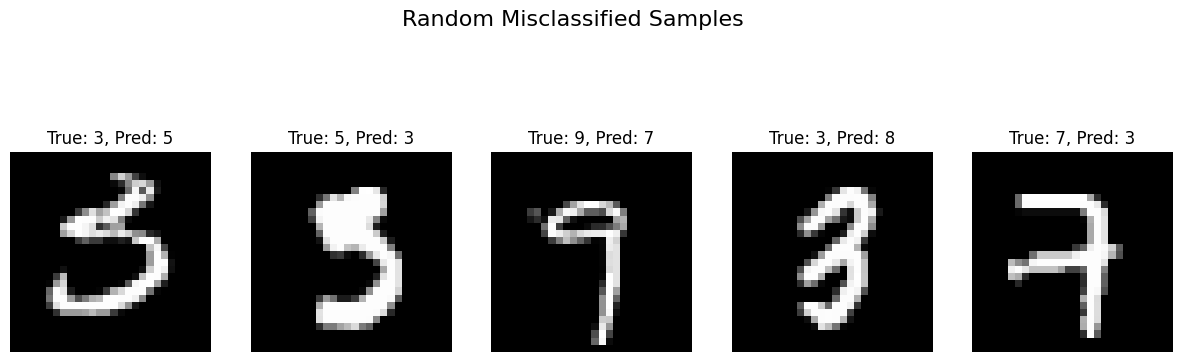

In [49]:
import random

# Find misclassified samples
misclassified_indices = np.where(y_test != y_pred_rf)[0]

# Randomly sample 5 indices from misclassified samples
random_misclassified_indices = random.sample(list(misclassified_indices), min(5, len(misclassified_indices)))

# Visualize random misclassified samples
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_misclassified_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_rf[idx]}")
    plt.axis('off')
plt.suptitle("Random Misclassified Samples", fontsize=16)
plt.show()

Test on a Single Image

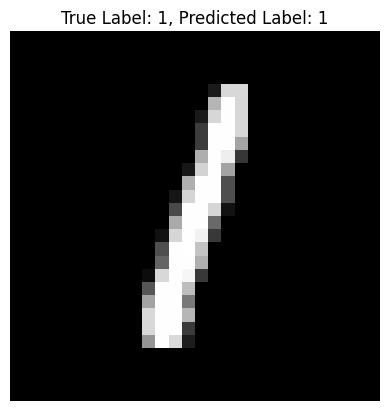

In [58]:
# Test the model with a single image from the test set
import random
random_index = random.randint(0, len(X_test)-1)
sample_image = X_test[random_index].reshape(1, -1)
sample_label = y_test[random_index]

# Predict the label
predicted_label = model.predict(sample_image)[0]

# Display the test image with its predicted and true label
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {sample_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

Save the Model

In [37]:
# Save the trained model for future use
import joblib
import os
os.makedirs('model', exist_ok=True)
joblib.dump(model, 'model/model.pkl')
print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'
